# Kenny Huang, Danny Hong, Arthur Skok

# xTREME TREESx

* Read sections: 9.2, 10.1, 10.6, 10.7,  10.9, 10.10 and https://arxiv.org/pdf/1603.02754v3.pdf
* Select a dataset for either classification or regression. It can be the same dataset as the one you used in the previous assignments, or a new one. Use an out of the box package for xTreme gradient boosting trees such as https://xgboost.readthedocs.io/en/latest/. Don’t use sci-kit’s gradient boosting method because there is no regularization built in (this is a key difference between gradient boosting and xTreme).
* Use the same 80-10-10 split to tune your classifier/regression method and report your performance and output the feature importance. Do the features reported make sense? If you are using the same dataset from assignment 1 or 2, do they agree with what you discovered using the Lasso penalty?

In [ ]:
# Forest Fire Data Again
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import sys
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data = pd.read_csv('forestfires.csv')

# Independent Variables / Features
'''
FFMC - FFMC index from the FWI system: 18.7 to 96.20
DMC - DMC index from the FWI system: 1.1 to 291.3
DC - DC index from the FWI system: 7.9 to 860.6
ISI - ISI index from the FWI system: 0.0 to 56.10
temp - temperature in Celsius degrees: 2.2 to 33.30
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
'''
x = data.iloc[:,4:-1]

# Dependent Variable / Target Variable
# area (0.00 to 1090.84)
y = data.iloc[:,-1]

# 80% train, 10% validation, 10% test
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
# train 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_ratio, random_state = 21)

# test is 10% of the initial data set
# validation is 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio), random_state =23) 
#getting baseline
print('x_train size is', x_train.shape)
print('x_val size is', x_val.shape)
print('x_test size is', x_test.shape)
mean_train = np.mean(y_train)
baseline = np.ones(y_test.shape)*mean_train

# Converting data into DMatrix format for train and test
# label is subspecies
train = xgb.DMatrix(x_train, label = y_train)
valid = xgb.DMatrix(x_val, label = y_val)
test = xgb.DMatrix(x_test, label = y_test)

# BASELINE MODEL
# Mean Absolute Error (MAE) for prediction quality evaluation
mean_train = np.mean(y_train)
baseline_predict = np.ones(y_test.shape) * mean_train
mae_baseline = mean_absolute_error(y_test, baseline_predict)
print("Mean is", mean_train)
# the average prediction is about 13.9 hectares (ha) off from the actual area
print("Baseline MAE is {:.2f}".format(mae_baseline))

# FINE TUNING XGBOOST MODEL
# Hyperparameter Values
params = {
    'max_depth': 3, # max depth of a tree, increasing value = make model complex and overfit
    'eta': 0.05, #learning rate
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'reg:squarederror'
    #'lambda' : 10
    }
# Here we started a loop to try to optimize the the parameters 
# Number of repeated trials
epochs = 20

begin = 0
end = 10
times = 50
error = np.zeros((times,1))
#for i in range (0, times):
#  model = xgb.train(param, train, epochs)
#  predictions = model.predict(valid)
#  error[i] = mean_squared_error(y_val, predictions)


#classifier
#clf = GridSearchCV(

# If performance haven’t improved for N rounds (N is defined by the variable early_stopping_round), we stop the training and keep the best number of boosting rounds
# nice way to find the best number of rounds while training
params['eval_metric'] = "mae"
num_boosted_round = 999
model = xgb.train (
    params,
    train,
    num_boost_round = 999,
    evals = [(test, "Test")], # a list of pairs (test_dmatrix, name_of_test), in this case using dtest DMatrix
    early_stopping_rounds = 50 # num rounds w/o improvement after which we should stop
)


x_train size is (413, 8)
x_val size is (52, 8)
x_test size is (52, 8)
Mean is 13.694164648910416
Baseline MAE is 12.43
[0]	Test-mae:5.69769
Will train until Test-mae hasn't improved in 50 rounds.
[1]	Test-mae:5.79369
[2]	Test-mae:5.92982
[3]	Test-mae:6.11891
[4]	Test-mae:6.29967
[5]	Test-mae:6.4797
[6]	Test-mae:6.65218
[7]	Test-mae:6.86218
[8]	Test-mae:7.07163
[9]	Test-mae:7.36591
[10]	Test-mae:7.57269
[11]	Test-mae:7.70721
[12]	Test-mae:7.93147
[13]	Test-mae:8.03326
[14]	Test-mae:8.24319
[15]	Test-mae:8.3911
[16]	Test-mae:8.47184
[17]	Test-mae:8.57609
[18]	Test-mae:8.70631
[19]	Test-mae:8.85178
[20]	Test-mae:8.95694
[21]	Test-mae:9.05038
[22]	Test-mae:9.18173
[23]	Test-mae:9.18635
[24]	Test-mae:9.3429
[25]	Test-mae:9.34197
[26]	Test-mae:9.35129
[27]	Test-mae:9.4759
[28]	Test-mae:9.63234
[29]	Test-mae:9.6247
[30]	Test-mae:9.74311
[31]	Test-mae:9.78343
[32]	Test-mae:9.88419
[33]	Test-mae:9.84398
[34]	Test-mae:9.94264
[35]	Test-mae:9.93409
[36]	Test-mae:10.0628
[37]	Test-mae:10.0262
[38]

[ 4.6115737  5.347329   5.4854403  2.8959808  5.95816    4.417735
  4.417735   9.16925    5.4854403  5.9202     4.039198   5.1396837
  7.224984   7.1305428  4.039198   9.272769   6.3910046  4.039198
  4.233037   3.08287    7.603522   4.417735   3.5791888  5.9202
  4.256608   6.829313   4.039198   3.8931835  5.347329   6.31032
  3.5791888  5.9202     6.4999967  5.95816    3.9577258 62.745407
 20.210627   4.039198   6.0868673 10.61811    7.170677   4.039198
  5.9202     4.6115737  6.490896   3.5791888  9.16925    5.585332
  5.95816   23.870579   5.9202     6.490896 ]
Baseline MAE is 12.43
MAE for our model is: 8.85178268652696


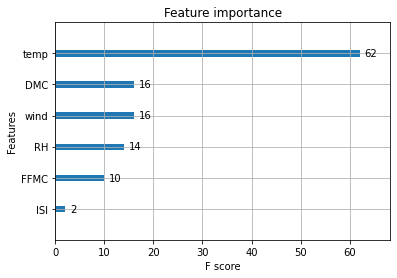

In [ ]:
model = xgb.train(params, train, epochs)
predictions = model.predict(test)
print(predictions)
finally_error = mean_absolute_error(y_test, predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))
print("MAE for our model is:", finally_error)
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
#tuning hyperparameters

cv_results = xgb.cv(
    params,
    train,
    num_boost_round=num_boosted_round,
    seed=45,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,13.508142,1.359216,13.735577,5.379677


In [ ]:
print("Dataset has {} entries and {} features".format(*data.shape))

Dataset has 517 entries and 13 features


In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)
#

x_train size: (517, 8)
x_test size: (517, 8)
y_train size: (517, 8)
y_test size: (517, 8)
